# Analysis of U20 Indonesian data

Load libraries and data in.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from numpy import * 

# %run clean-data.py # concatenates and cleans data into DataFrame called df
df = pd.read_csv('../data/U20Indonesian_TestData.csv')

Check that data were loaded correctly.

In [2]:
df.sample(10)

,ID,sex,condition,trials,phase,trial,type,correctChoice,choice1,choice2,...,mod,oldNoun,oldMod1,oldMod2,choiceType1,choiceType2,choiceType3,choiceType4,choice,binaryCorrect
3422,id_Thu Jul 06 2017 11:03:46 GMT+0100 (GMT Dayl...,female,condition_AdjNum,testTrial31_outer_2_shoe two_two shoe_----_---...,test,testTrial31,outer,2,shoe two,two shoe,...,shoe,True,True,NaN,NaN,NaN,NaN,NaN,2,1
6999,id_Wed Jun 21 2017 22:34:24 GMT+0700 (SE Asia ...,female,condition_NumDem,testTrial8_inner-outer_4_arrow that six_six th...,test,testTrial8,inner-outer,4,arrow that six,six that arrow,...,arrow,False,False,True,N-Outer-Inner,Inner-Outer-N,N-Inner-Outer,Outer-Inner-N,4,1
5394,id_Tue Jun 27 2017 13:10:35 GMT+0700 (SE Asia ...,female,condition_AdjNum,testTrial3_outer_1_six pillow_pillow six_----_...,test,testTrial3,outer,1,six pillow,pillow six,...,pillow,True,True,NaN,NaN,NaN,NaN,NaN,1,1
4229,id_Thu Jun 22 2017 10:44:34 GMT+0700 (SE Asia ...,male,condition_AdjDem,testTrial38_outer_1_this table_table this_----...,test,testTrial38,outer,1,this table,table this,...,table,False,True,NaN,NaN,NaN,NaN,NaN,1,1
6625,id_Wed Jun 21 2017 18:16:50 GMT+0700 (SE Asia ...,female,condition_AdjNum,testTrial34_inner-outer_4_blue ten duck_duck b...,test,testTrial34,inner-outer,4,blue ten duck,duck blue ten,...,duck,False,False,False,Inner-Outer-N,N-Inner-Outer,N-Outer-Inner,Outer-Inner-N,4,1
32,id_Fri Jul 07 2017 08:46:31 GMT+0700 (SE Asia ...,female,condition_AdjDem,testTrial1_inner-outer_3_cherry orange this_or...,test,testTrial1,inner-outer,3,cherry orange this,orange this cherry,...,cherry,True,False,True,N-Inner-Outer,Inner-Outer-N,Outer-Inner-N,N-Outer-Inner,3,1
4539,id_Thu Jun 29 2017 20:25:50 GMT+0700 (SE Asia ...,female,condition_AdjNum,testTrial28_inner-outer_1_eight spotted pillow...,test,testTrial28,inner-outer,1,eight spotted pillow,pillow eight spotted,...,pillow,True,True,True,Outer-Inner-N,N-Outer-Inner,N-Inner-Outer,Inner-Outer-N,1,1
1250,id_Mon Jul 10 2017 15:38:08 GMT+0700 (SE Asia ...,female,condition_NumDem,testTrial19_outer_2_shirt this_this shirt_----...,test,testTrial19,outer,2,shirt this,this shirt,...,shirt,True,True,NaN,NaN,NaN,NaN,NaN,2,1
2526,id_Sat Jun 24 2017 21:36:20 GMT+0700 (WIB) 0160,male,condition_AdjDem,testTrial15_outer_1_that bottle_bottle that_--...,test,testTrial15,outer,1,that bottle,bottle that,...,bottle,False,True,NaN,NaN,NaN,NaN,NaN,1,1
5171,id_Tue Jul 11 2017 22:11:31 GMT+0700 (WIB),female,condition_AdjNum,testTrial20_outer_2_leaf nine_nine leaf_----_-...,test,testTrial20,outer,2,leaf nine,nine leaf,...,leaf,True,True,NaN,NaN,NaN,NaN,NaN,2,1


Select data from the test phase only.

In [3]:
df = df[df.phase=='test']

Check how many participants we have in each condition:

In [4]:
df.groupby('condition').ID.nunique()

condition
condition_AdjDem    28
condition_AdjNum    31
condition_NumDem    32
Name: ID, dtype: int64

Check by participant accuracy on single-modifier trials.  The critical column is `post` denoting whether or not (1 or 0) a response was postnominal.

In [5]:
df[df.type=='inner-outer'].groupby(['ID', 'condition']).binaryCorrect.mean()

ID                                                                 condition       
id_Fri Jul 07 2017 08:46:31 GMT+0700 (SE Asia Standard Time) 9699  condition_AdjDem    1.000000
id_Fri Jul 07 2017 21:56:52 GMT+0700 (SE Asia Standard Time) 2225  condition_NumDem    1.000000
id_Fri Jul 14 2017 17:18:25 GMT+0700 (SE Asia Standard Time)       condition_AdjNum    0.833333
id_Fri Jul 14 2017 21:14:41 GMT+0700 (WIB)                         condition_NumDem    1.000000
id_Fri Jun 23 2017 00:01:12 GMT+0700 (SE Asia Standard Time) 6080  condition_AdjNum    0.000000
id_Fri Jun 23 2017 11:38:57 GMT+0700 (SE Asia Standard Time) 8119  condition_AdjNum    0.166667
id_Fri Jun 23 2017 17:45:36 GMT+0700 (SE Asia Standard Time) 5414  condition_NumDem    1.000000
id_Fri Jun 23 2017 18:03:02 GMT+0700 (SE Asia Standard Time) 7033  condition_AdjDem    0.033333
id_Fri Jun 23 2017 18:11:44 GMT+0700 (SE Asia Standard Time) 4668  condition_AdjDem    1.000000
id_Fri Jun 30 2017 17:59:21 GMT+0700 (SE Asia Standa

Plot histogram of single-modifier trial accuracy.

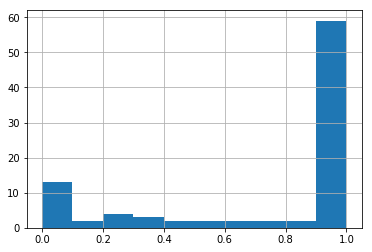

In [6]:
df[df.type=='inner-outer'].groupby(['ID', 'condition']).binaryCorrect.mean().hist()

In [7]:
aggregators = {'binaryCorrect':mean}

gp = df[df.type=='inner-outer'].groupby(['ID', 'condition'], as_index=False).agg(aggregators)

[(-0.05, 1.05)]

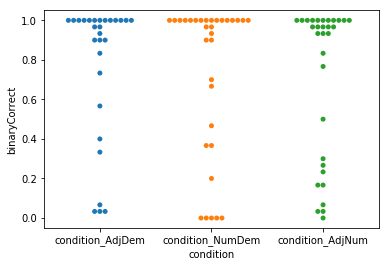

In [8]:
ax = sns.swarmplot(x='condition', y='binaryCorrect', data=gp)
ax.set(ylim=(-0.05,1.05))

Prepare to do R modelling.

In [9]:
%load_ext rpy2.ipython

Load in data and create subsets on which each model will be run.

In [11]:
%%R
library('lme4')

d <- read.csv('../data/U20Indonesian_TestData.csv')
test <- subset(d, d$type=='inner-outer') # only select two modifier trials

testAdjDem <- subset(test, test$condition=="condition_AdjDem")
testAdjNum <- subset(test, test$condition=="condition_AdjNum")
testNumDem <- subset(test, test$condition=="condition_NumDem")

Run models for the adj-dem condition, and test whether intercept is significantly different from chance level.

In [12]:
%%R

m1AdjDem <- glmer(binaryCorrect ~ 1 + (1|ID) + (1|mod), family=binomial, data=testAdjDem)
m0AdjDem <- glmer(binaryCorrect ~ 0 + (1|ID) + (1|mod), family=binomial, data=testAdjDem)

anova(m1AdjDem, m0AdjDem)

Data: testAdjDem
Models:
m0AdjDem: binaryCorrect ~ 0 + (1 | ID) + (1 | mod)
m1AdjDem: binaryCorrect ~ 1 + (1 | ID) + (1 | mod)
         Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
m0AdjDem  2 424.41 433.87 -210.20   420.41                             
m1AdjDem  3 409.98 424.18 -201.99   403.98 16.428      1  5.052e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Run models for the adj-num condition, and test whether intercept is significantly different from chance level.

In [14]:
%%R

m1AdjNum <- glmer(binaryCorrect ~ 1 + (1|ID) + (1|mod), family=binomial, data=testAdjNum)
m0AdjNum <- glmer(binaryCorrect ~ 0 + (1|ID) + (1|mod), family=binomial, data=testAdjNum)

anova(m1AdjNum, m0AdjNum)

Data: testAdjNum
Models:
m0AdjNum: binaryCorrect ~ 0 + (1 | ID) + (1 | mod)
m1AdjNum: binaryCorrect ~ 1 + (1 | ID) + (1 | mod)
         Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
m0AdjNum  2 503.93 513.60 -249.96   499.93                             
m1AdjNum  3 494.43 508.94 -244.22   488.43 11.493      1  0.0006987 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Run models for the num-dem condition, and test whether intercept is significantly different from chance level.

In [15]:
%%R

m1NumDem <- glmer(binaryCorrect ~ 1 + (1|ID) + (1|mod), family=binomial, data=testNumDem)
m0NumDem <- glmer(binaryCorrect ~ 0 + (1|ID) + (1|mod), family=binomial, data=testNumDem)

anova(m1NumDem, m0NumDem)

Data: testNumDem
Models:
m0NumDem: binaryCorrect ~ 0 + (1 | ID) + (1 | mod)
m1NumDem: binaryCorrect ~ 1 + (1 | ID) + (1 | mod)
         Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
m0NumDem  2 415.25 424.98 -205.62   411.25                             
m1NumDem  3 402.20 416.80 -198.10   396.20 15.053      1  0.0001045 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
